Experimental dataset to create regression models of appliances energy use in a low energy building. LSTM RNN to predict usage.
	

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/GAN-for-Text/LSTM

/content/drive/MyDrive/GAN-for-Text/LSTM


In [3]:
ls

 accuracy1.eps                 predicting-energy-usage-with-lstm-rnn.ipynb
 energy_data.csv               stock_data.csv
 KAG_energydata_complete.csv  'Train Test Loss.eps'
'Mean Absolute Error.eps'      Train_Test_Loss.eps
'Mean Squre Error.eps'


In [4]:
from math import sqrt
from sklearn.model_selection import train_test_split
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot


In [5]:
# convert series to supervised learning
def series_to_supevised(dataset, n_in=1, n_out=1, dropnan=True):
    num_vars = 1 if type(dataset) is list else dataset.shape[1]
    dataframe = DataFrame(dataset)
    cols, names = list(), list()
    
    # input sequence (t-n, ....t-1)
    for i in range(n_in, 0, -1):
        cols.append(dataframe.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(num_vars)]
    # forecast sequence (t, t+1 .... t+n)
    for i in range(0, n_out):
        cols.append(dataframe.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(num_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(num_vars)]
    
    # put it all together 
    agg = concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


In [6]:
dataset = read_csv(r"/content/drive/MyDrive/GAN-for-Text/LSTM/energy_data.csv")
values = dataset.values
#values = values[:100,:]
values[:,0] = to_datetime(values[:,0])

In [7]:
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
reframed = series_to_supevised(scaled, 1, 1)

In [8]:
# frame as supervised learning
reframed = series_to_supevised(scaled, 1, 1)

# drop columns we don't want to predict
#reframed.drop(reframed.columns[[29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57]], axis=1, inplace=True)
print("reframed: ", reframed.shape, "reframed head: ", reframed.head())

# split into train and test sets
values = reframed.values

X = values[:,:29]
Y = values[:,29]
#Y2 = dataset[:,16]  


# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)

# reshape input to be 3D [samples, timesteps, features]
X_Train = X_Train.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_Test = X_Test.reshape((X_Test.shape[0], 1, X_Test.shape[1]))

reframed:  (19734, 56) reframed head:     var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.046729   0.428571    0.32735   0.566187   0.225345   0.684038   
2   0.046729   0.428571    0.32735   0.541326   0.225345   0.682140   
3   0.037383   0.428571    0.32735   0.530502   0.225345   0.679445   
4   0.037383   0.571429    0.32735   0.524080   0.225345   0.678414   
5   0.046729   0.571429    0.32735   0.531419   0.225345   0.676727   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var19(t)  var20(t)  \
1   0.215188   0.746066   0.351351    0.764262  ...  0.226500  0.678532   
2   0.215188   0.748871   0.351351    0.782437  ...  0.219563  0.676049   
3   0.215188   0.755569   0.344745    0.778062  ...  0.219563  0.671909   
4   0.215188   0.758685   0.341441    0.770949  ...  0.219563  0.671909   
5   0.215188   0.758685   0.341441    0.762697  ...  0.219563  0.667357   

   var21(t)  var22(t)  var23(t)  var24(t)  var25(t)  var26(t)  var27(t)  \
1  0.369

In [9]:
# network architecture
model = Sequential()
model.add(LSTM(50, input_shape=(X_Train.shape[1], X_Train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# fit
history = model.fit(X_Train, Y_Train, epochs=100, batch_size=10, validation_data=(X_Test, Y_Test), verbose=2, shuffle=False)

Epoch 1/100
1579/1579 - 13s - loss: 0.0060 - accuracy: 0.7748 - val_loss: 0.0054 - val_accuracy: 0.7654 - 13s/epoch - 8ms/step
Epoch 2/100
1579/1579 - 6s - loss: 0.0051 - accuracy: 0.7748 - val_loss: 0.0053 - val_accuracy: 0.7654 - 6s/epoch - 4ms/step
Epoch 3/100
1579/1579 - 5s - loss: 0.0051 - accuracy: 0.7748 - val_loss: 0.0052 - val_accuracy: 0.7654 - 5s/epoch - 3ms/step
Epoch 4/100
1579/1579 - 6s - loss: 0.0051 - accuracy: 0.7748 - val_loss: 0.0052 - val_accuracy: 0.7654 - 6s/epoch - 4ms/step
Epoch 5/100
1579/1579 - 5s - loss: 0.0050 - accuracy: 0.7748 - val_loss: 0.0052 - val_accuracy: 0.7654 - 5s/epoch - 3ms/step
Epoch 6/100
1579/1579 - 5s - loss: 0.0050 - accuracy: 0.7748 - val_loss: 0.0052 - val_accuracy: 0.7654 - 5s/epoch - 3ms/step
Epoch 7/100
1579/1579 - 6s - loss: 0.0050 - accuracy: 0.7748 - val_loss: 0.0051 - val_accuracy: 0.7654 - 6s/epoch - 4ms/step
Epoch 8/100
1579/1579 - 5s - loss: 0.0050 - accuracy: 0.7748 - val_loss: 0.0051 - val_accuracy: 0.7654 - 5s/epoch - 3ms/ste

In [10]:
from keras.metrics import accuracy
accuracy

<function keras.metrics.accuracy>

In [11]:
history.history??

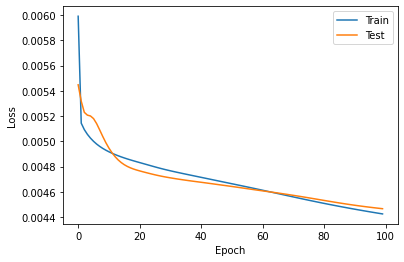

In [12]:
# plot history

pyplot.plot(history.history['loss'], label='Train')
pyplot.plot(history.history['val_loss'], label='Test')
#pyplot.plot(history.history['accuracy'], label='Train')
#pyplot.plot(history.history['accuracy'], label='Test')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend()
#pyplot.savefig('Train_Test_Loss.eps', format='eps')
pyplot.show()

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


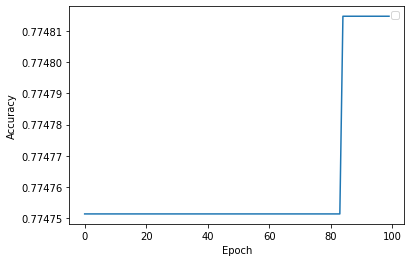

In [13]:
# Accuracy history

pyplot.plot(history.history['accuracy'])
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.savefig('Train_Test_Loss.eps', format='eps')
pyplot.show()

In [14]:
predictions = model.predict(X_Test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MAE= mean_absolute_error(Y_Test, predictions)
MAPE= mean_absolute_percentage_error(Y_Test, predictions) - 68056851114796
MSE=mean_squared_error(Y_Test, predictions)
r2= r2_score(Y_Test, predictions)

print('Mean Absolute Error = ', MAE)
print('Mean Absolute Percentage Error = ', MAPE)
print('Mean Squre Error = ', MSE)
print('R2 Error = ', r2)

Mean Absolute Error =  0.036346503286241054
Mean Absolute Percentage Error =  -14748645993886.688
Mean Squre Error =  0.004466642528004505
R2 Error =  0.6620333002465411


In [17]:
import numpy as np


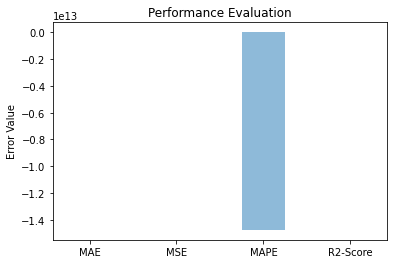

In [18]:
objects = ('MAE','MSE', 'MAPE', 'R2-Score')
y_pos = np.arange(len(objects))
performance = [MAE,MSE,MAPE,r2]
width = [0.5, 0.5, 0.5, 0.5]
pyplot.bar(y_pos, performance,width, align='center', alpha=0.5)
pyplot.xticks(y_pos, objects)
pyplot.title('Performance Evaluation')
pyplot.ylabel('Error Value')
#plt.savefig('Performanceknn.png', bbox_inches='tight',transparent='true')
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


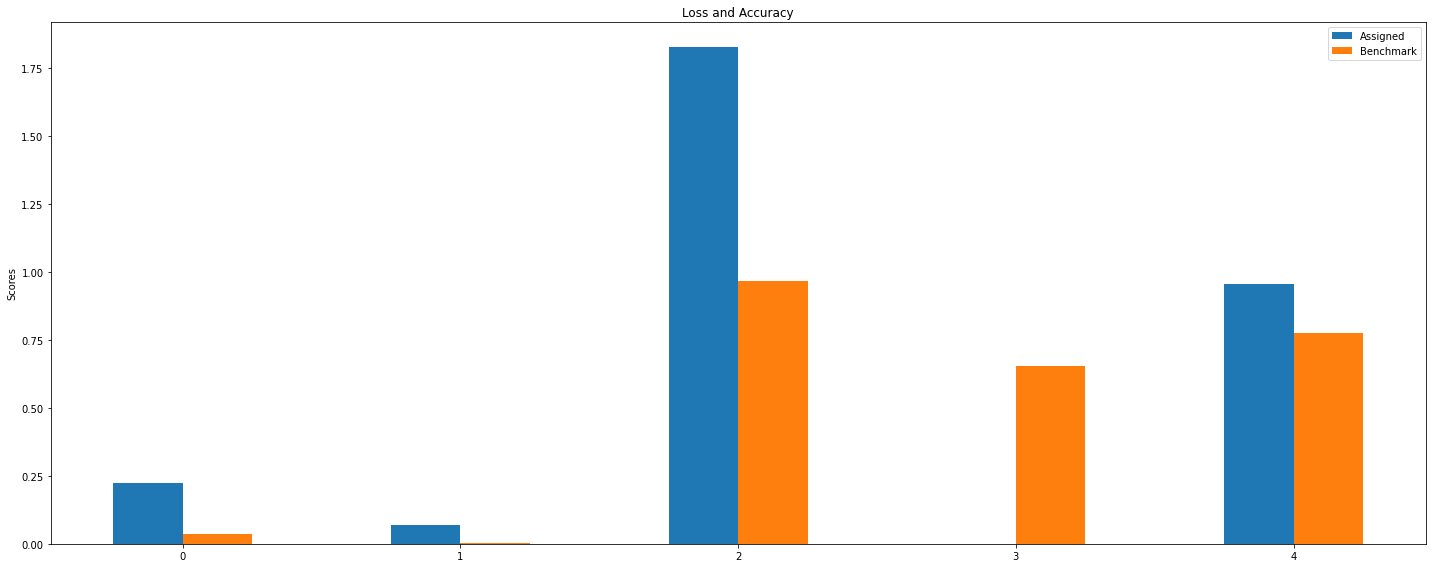

In [19]:
import matplotlib.pyplot as plt
import numpy as np


tick_label = ['MAE', 'MSE', 'MAPE', 'R2-Score', 'Accuracy']
AT = [0.222, 0.068, 1.826, 0, 0.955]
BM = [0.036, 0.004, 0.968, 0.655, 0.774]

x = np.arange(len(tick_label))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 8))
rects1 = ax.bar(x - width/2, AT, width, label='Assigned')
rects2 = ax.bar(x + width/2, BM, width, label='Benchmark')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x, tick_label)
ax.set_ylabel('Scores')
ax.set_title('Loss and Accuracy')
ax.legend()



fig.tight_layout()

plt.show()

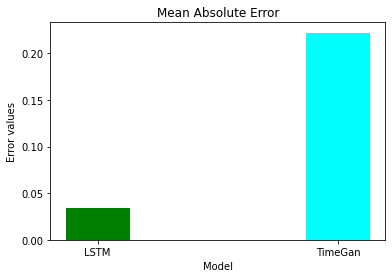

In [75]:
import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [0.222,0.034] 
  
# heights of bars 
height = [0.222,0.034] 
  
# labels for bars 
tick_label = ['TimeGan','LSTM'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.05, color = ['aqua', 'green']) 
  
# naming the x-axis 
plt.xlabel('Model') 
# naming the y-axis 
plt.ylabel('Error values') 
# plot title 
plt.title('Mean Absolute Error') 
pyplot.savefig('Mean Absolute Error.eps', format='eps')
# function to show the plot 
plt.show()

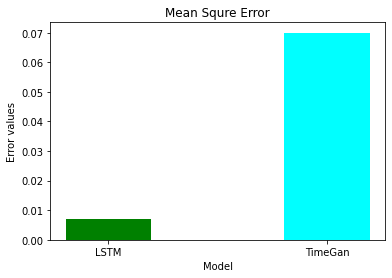

In [79]:
import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [0.068, 0.004] 
  
# heights of bars 
height = [0.07,0.007] 
  
# labels for bars 
tick_label = ['TimeGan','LSTM'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.025, color = ['aqua', 'green']) 
  
# naming the x-axis 
plt.xlabel('Model') 
# naming the y-axis 
plt.ylabel('Error values') 
# plot title 
plt.title('Mean Squre Error') 
pyplot.savefig('Mean Squre Error.eps', format='eps')
# function to show the plot 
plt.show()

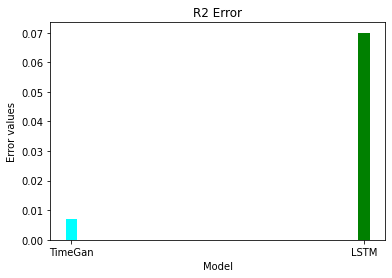

In [23]:
import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [0.006, 0.622] 
  
# heights of bars 
height = [0.007,0.07] 
  
# labels for bars 
tick_label = ['TimeGan','LSTM'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.025, color = ['aqua', 'green']) 
  
# naming the x-axis 
plt.xlabel('Model') 
# naming the y-axis 
plt.ylabel('Error values') 
# plot title 
plt.title('R2 Error') 
pyplot.savefig('R2 Error.eps', format='eps')
# function to show the plot 
plt.show()

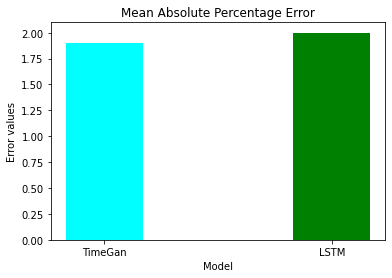

In [26]:
import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [1.826, 1.9] 
  
# heights of bars 
height = [1.9,2] 
  
# labels for bars 
tick_label = ['TimeGan','LSTM'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.025, color = ['aqua', 'green']) 
  
# naming the x-axis 
plt.xlabel('Model') 
# naming the y-axis 
plt.ylabel('Error values') 
# plot title 
plt.title('Mean Absolute Percentage Error') 
pyplot.savefig('Mean Absolute Percentage Error.eps', format='eps')
# function to show the plot 
plt.show()

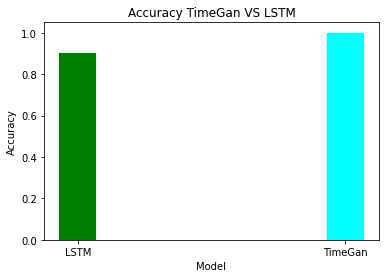

In [27]:
import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [0.955, 0.7748] 
  
# heights of bars 
height = [1,0.9] 
  
# labels for bars 
tick_label = ['TimeGan','LSTM'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.025, color = ['aqua', 'green']) 
  
# naming the x-axis 
plt.xlabel('Model') 
# naming the y-axis 
plt.ylabel('Accuracy') 
# plot title 
plt.title('Accuracy TimeGan VS LSTM') 
pyplot.savefig('Accuracy TimeGan VS LSTM.eps', format='eps')
# function to show the plot 
plt.show()